Project History :
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 

Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the key variables.The lowest scores observed for the key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


This dataset can be viewed as regression task. We need to predict the happiness score considering all the other factors such as GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption to describe the extent to which these factors contribute in evaluating the happiness in each country mentioned in the dataset.

Dataset: The dataset is from Kaggle


Bussinness/Social Implication:
    Happiness indicators is used by the Goverment to inform their policy-making decisions
    Happiness indicators is used to measure the progress of a nation.
    It helped to measure the well-being of people in a country.

Attribute Information
Input variables :
1 - Country
2 - Region
3 -Dystopia Residual
4 - Happiness Score
5 - Standard Error
6 -Economy (GDP per Capita)
7 - Family
8 - Health (Life Expectancy)
9 - Freedom
10 - Trust (Government Corruption
11 - Generosity
Output variable :
12 - Happiness Rank (based on GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption) 

Project Objective : Understand the Dataset & cleanup (if required).
Build classification models to predict predict  the happiness score considering all the other factors such as GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption
Also fine-tune the hyperparameters & compare the evaluation metrics of various regression algorithms, choose the best model with highest accuracy.

Steps to Follow for the Project: The dataset contains 12 features and 158 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# 1: Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

# 2: Importing required Dataset

In [2]:
# Importing the dataset downloaded from kaggle
happiness_data=pd.read_csv('happiness_score_dataset.csv')
happiness_data.head(25)  # displaying first 25 records from the dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# 3: Data Cleaning and Transfroming

In [3]:
happiness_data.shape # to determine the dimension of the dataset

(158, 12)

In [4]:
happiness_data.info() # to display all the information about respective features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

All the features are numerical except for Country and Region column

In [5]:
# Determine the Categorical and Numeric Values
features=happiness_data.drop('Happiness Rank',axis=1)
nu = features.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(features.shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 11 numerical & 0 categorical features.


In [6]:
# Checking for missing values
happiness_data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can infer that there is no missing values and the dataset is appropriate for the prediction

In [7]:
# Checking the uniqueness of each features
happiness_data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

We can infer that all other features are discrete variable apart from the region

In [8]:
happiness_data['Region'].unique() # displaying distinct values for region

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [9]:
# Checking for duplicate values
happiness_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [10]:
# displaying the number of duplicated values in the dataset
happiness_data[happiness_data.duplicated()==True].shape[0]

0

We can infer that there is no duplicated value in our dataset

In [11]:
happiness_data.describe() # Performing Descriptive Statistical Analysis on the  Features

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We can infer from the statistics that there is no missing data since the count of each feature is 158. There seem to be very few or no outliers present as there not much difference in the interquartile ranges.

# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

In [12]:
# Univarite Analysis
# Determine the unique values for each region
happiness_region = happiness_data["Region"].value_counts()

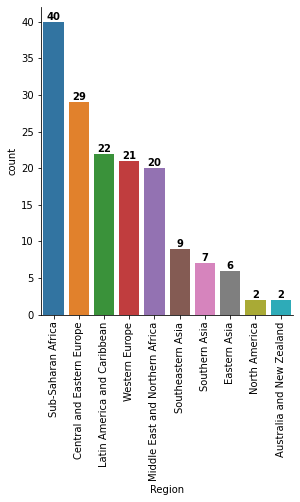

In [13]:
sns.catplot(x = 'Region', data = happiness_data , kind = 'count',margin_titles = True,order=happiness_region.index) # plotting the quality of wine
#add value labels to the bar chat
for index,value in enumerate(happiness_region.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    plt.xticks(rotation = 90)

We can infer from the visualization that Sub Saharan Africa has the highest number of 40 while North America, Australia and New Zealand have the lowest number of 2. In summary Region columns have imbalanced categories

In [14]:
# Bivarite Analysis
# function to Visualizing Categorical values using Scatter plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
    sns.scatterplot(x=Categorical_column,y='Happiness Score', data=happiness_data, hue='Region')
    plt.title(f"{Categorical_column.title()} vs Happiness Score",fontweight="black",size=25,pad=10,)
    col_values = happiness_data[Categorical_column].value_counts()
    plt.tight_layout()

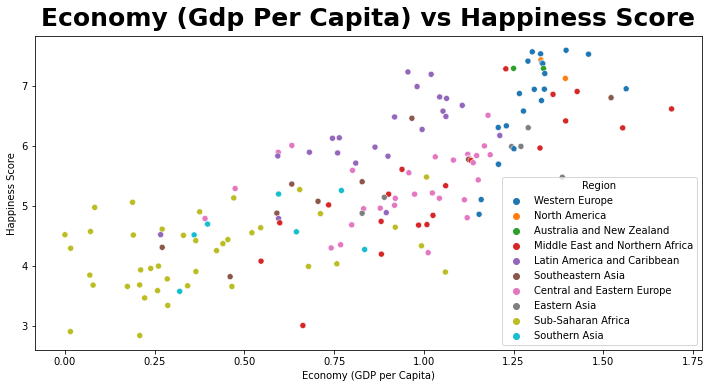

In [15]:
features_plot("Economy (GDP per Capita)") # Calling function features_plot to plot fixed acidity against wine quality

We can infer from the plot above that there is a positive correlation between Happiness Score and Economy (GDP per Capita).

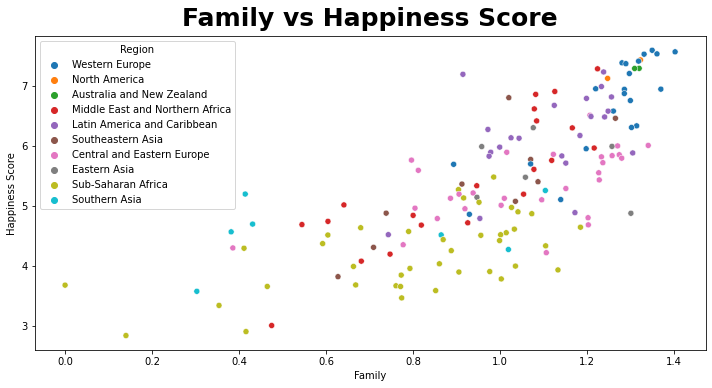

In [16]:
features_plot("Family")

We can infer from the plot above that there is a positive correlation between Happiness Score and Family.

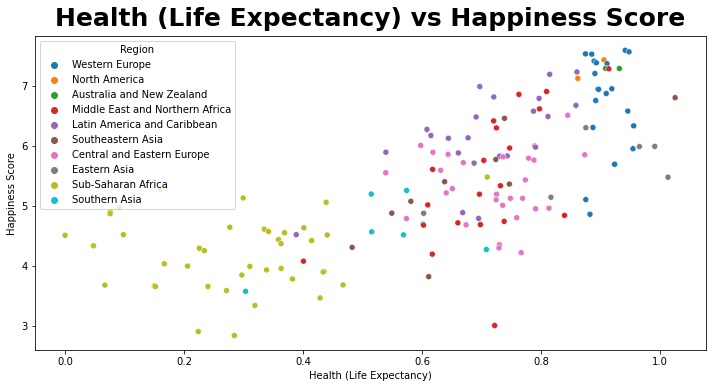

In [17]:
features_plot("Health (Life Expectancy)")

We can infer from the plot above that there is a positive correlation between Happiness Score and Health (Life Expectancy) with some outliers.

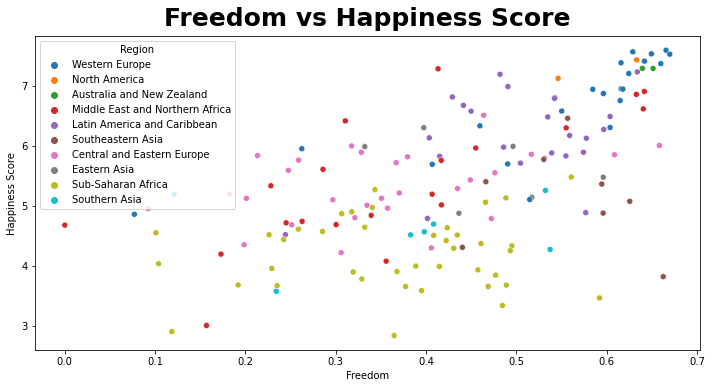

In [18]:
features_plot("Freedom")

We can infer from the plot above that there is a positive correlation between Happiness Score and Freedom with some outliers

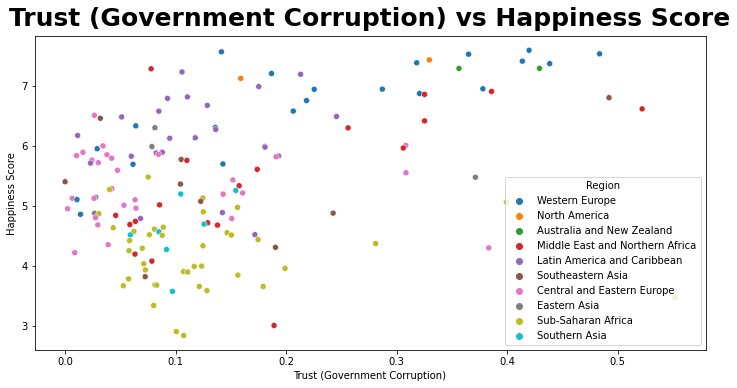

In [19]:
features_plot("Trust (Government Corruption)")

We can infer from the plot above that there is an irregular correlation between Happiness Score and Trust (Goverment Corruption)

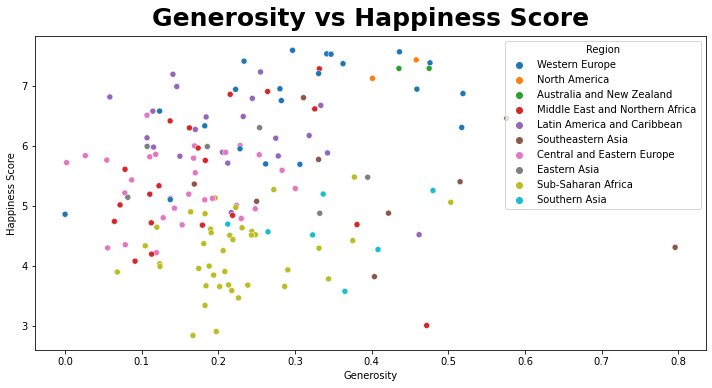

In [20]:
features_plot("Generosity")

We can infer from the plot above that there is no correlation between Happiness Score and Generosity

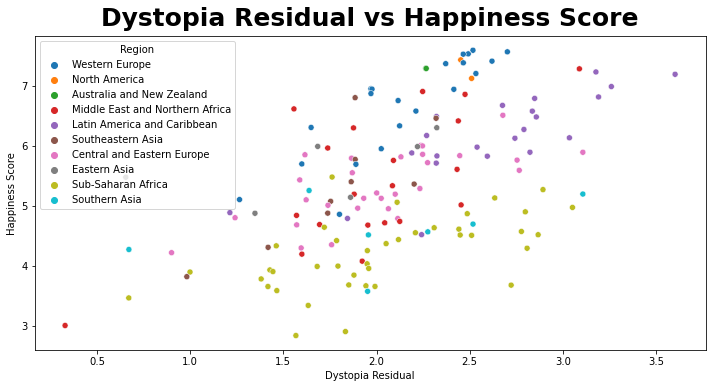

In [21]:
features_plot("Dystopia Residual")

We can infer from the plot above that there is positive  correlation between Happiness Score and Dystopia Residual

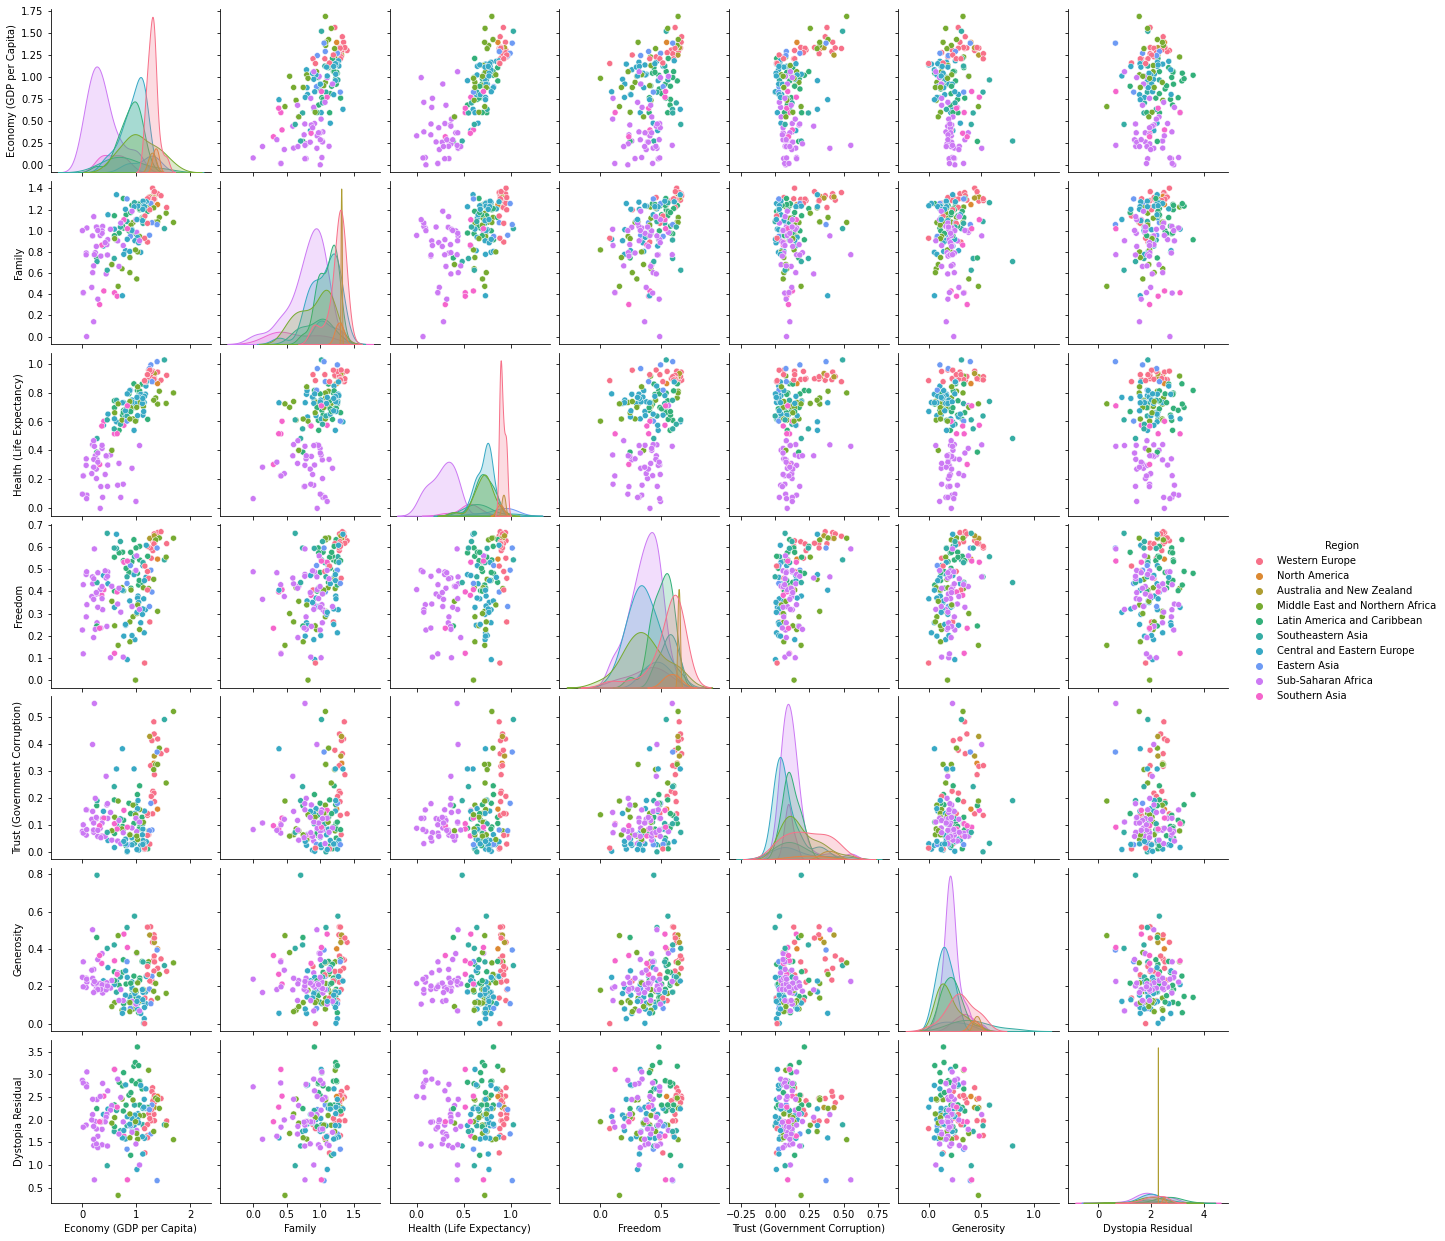

In [22]:
# Multivarite Analysis
#Pairplot of all numerical variables
sns.pairplot(happiness_data, vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'],hue='Region',palette="husl")
plt.show()

Pairplot show that our target feature(Happiness Score) shows positive linear correlation with almost all features except for a few which show no correlation

# 5: Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

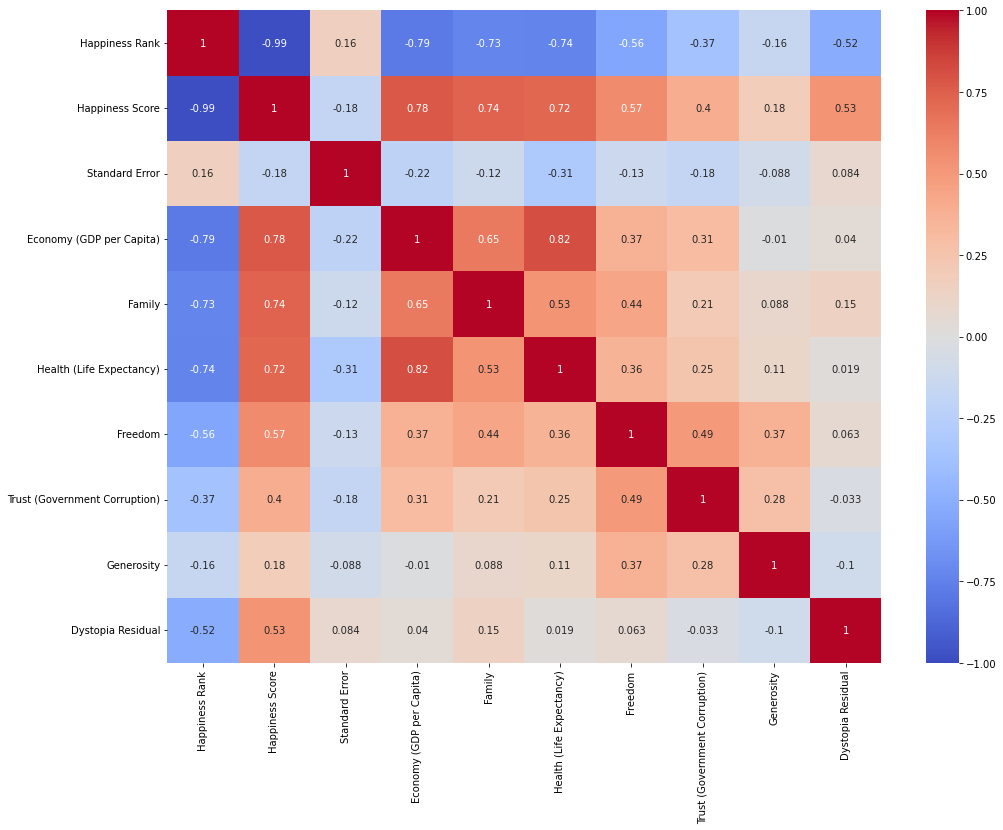

In [23]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(happiness_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=happiness_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Happiness Score show a strong correlation between Economy,Family,Health and Dystopia while a negative correlation with Happiness Rank

# 6: Data Preprocessing

In [24]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
happiness_data['Region'] = le.fit_transform(happiness_data['Region']) # Convering Region object into integer variable
 
# printing label
happiness_data['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [25]:
# Separating feature data and Label data
X = happiness_data.drop(['Country','Happiness Rank'],axis=1) # drop column charges
y = happiness_data['Happiness Rank']
y

0        1
1        2
2        3
3        4
4        5
      ... 
153    154
154    155
155    156
156    157
157    158
Name: Happiness Rank, Length: 158, dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    int32  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 11.9 KB


In [27]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler # importing the library for standard scaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X) # Standardise the X variables
X=pd.DataFrame(X_Scalar,columns=X.columns)  # Converting the standardised variable to Dataframe
X.head(10)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.300256,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.040302,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
5,1.300256,1.778780,-0.964481,1.105190,1.205183,1.050980,1.418466,2.259005,-0.029976,0.943417
6,1.300256,1.754249,-1.163991,1.202715,1.064891,1.066124,1.245847,1.460200,1.891021,0.664600
7,1.300256,1.741983,-0.954535,1.208364,1.097671,1.139329,1.539026,2.465602,0.992407,0.493323
8,-1.715998,1.673644,-0.829329,1.005474,1.210376,1.129179,1.403088,2.388546,1.882389,0.299519
9,-1.715998,1.671892,-0.412755,1.213018,1.171924,1.223334,1.482041,1.779705,1.570472,0.303524


In [28]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((126, 10), (32, 10), (126,), (32,))

# 7: Predictive Modelling using various algorithms

# Linear Regression

In [29]:
lreg=LinearRegression()

In [30]:
lreg.fit(X_train,y_train) # Fit the model

LinearRegression()

In [32]:
y_pred= lreg.predict(X_test) # Predict the model
y_pred.shape

(32,)

In [33]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(y_pred,y_test)
LR_mse=mean_squared_error(y_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(y_pred,y_test))
LR_r2=r2_score(y_test,y_pred)
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 4.30473765484194
Mean squared error  => 35.3735324184945
Root Mean squared error  => 5.947565251301956
R2 Score  => 0.9843503139889396
Accuracy Score of Testing Data is => 98.68


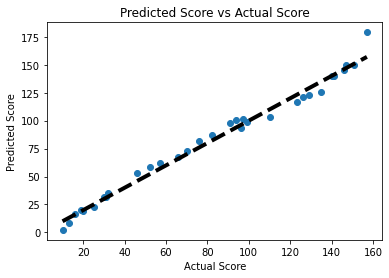

In [34]:
# Plot the predicted score against the actual score
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()


In [35]:
# Print a summary of the linear regression model
print('Linear Regression Model Summary')
print('------------------')
print('Intercept:', lreg.intercept_)
for i, col in enumerate(X.columns):
    print(col, ':', lreg.coef_[i])
print('------------------')
print('R-squared:', LR_r2)
print('------------------')

Linear Regression Model Summary
------------------
Intercept: 79.67887656164191
Region : 1.4900552079429816
Happiness Score : -1001.5820032515022
Standard Error : -0.5112573097886184
Economy (GDP per Capita) : 335.5307897495341
Family : 228.5917325355473
Health (Life Expectancy) : 206.0534604507307
Freedom : 125.09345628705155
Trust (Government Corruption) : 101.43548421313193
Generosity : 105.772263426704
Dystopia Residual : 462.8155400741193
------------------
R-squared: 0.9843503139889396
------------------


In this case, an R-squared value of 0.9843  indicates that the independent variables collectively explain 98.43% of the variance in the dependent variable, which is a relatively high value. The model has a moderate-to-strong predictive power, and the independent variables included in the model are significant in explaining the variation in happiness score

# Random Forest Classifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 500, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18)

In [37]:
rfc.fit(X_train, y_train) # Fit the model

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=500,
                       random_state=18)

In [40]:
rfc_pred = rfc.predict(X_test) # Predict the model
rfc_pred.shape

(32,)

In [41]:
#Accuracy and various Metrics for the model
rfc_testing=round(rfc.score(X_train, y_train)*100,2)
rfc_mae=mean_absolute_error(rfc_pred,y_test)
rfc_mse=mean_squared_error(rfc_pred,y_test)
rfc_rmse=np.sqrt(mean_squared_error(rfc_pred,y_test))
rfc_r2=r2_score(y_test,rfc_pred)
print('Mean absolute error  =>',rfc_mae)
print('Mean squared error  =>',rfc_mse)
print('Root Mean squared error  =>',rfc_rmse)
print('R2 Score  =>',rfc_r2)
print("Accuracy Score of Testing Data is =>",rfc_testing)

Mean absolute error  => 11.9375
Mean squared error  => 477.5
Root Mean squared error  => 21.85177338341216
R2 Score  => 0.7887481243921691
Accuracy Score of Testing Data is => 100.0


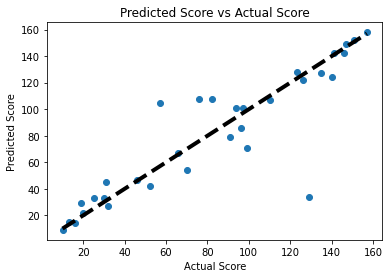

In [42]:
# Plot the predicted score against the actual score
plt.scatter(y_test, rfc_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()

In [43]:
# Print a summary of the random forest model
print('Random Forest Model Summary')
print('------------------')
for i, col in enumerate(X.columns):
    print(col, ':', rfc.feature_importances_[i])
print('------------------')
print('R-squared:', rfc_r2)
print('------------------')

Random Forest Model Summary
------------------
Region : 0.05077626620125237
Happiness Score : 0.09909837494328638
Standard Error : 0.1073467189014266
Economy (GDP per Capita) : 0.10765874828668646
Family : 0.10321863121430726
Health (Life Expectancy) : 0.10676954149007625
Freedom : 0.10452411020164268
Trust (Government Corruption) : 0.10354502019367898
Generosity : 0.1075443537166701
Dystopia Residual : 0.10951823485097269
------------------
R-squared: 0.7887481243921691
------------------


In this case, an R-squared value of 0.7887  indicates that the independent variables collectively explain 78.87% of the variance in the dependent variable, which is a relatively high value. The model has a moderate-to-strong predictive power, and the independent variables included in the model are significant in explaining the variation in happiness score

# XGBoost Model

In [44]:
# Simple model
xgbreg = XGBRegressor(random_state = 0)

In [46]:
# Fit the model
xgbreg.fit(X_train, y_train)

# Get predictions
predict_xgb = xgbreg.predict(X_test)
predict_xgb.shape

(32,)

In [47]:
#Accuracy and various Metrics for the model
xgb_testing=round(rfc.score(X_train, y_train)*100,2)
xgb_mae=mean_absolute_error(predict_xgb,y_test)
xgb_mse=mean_squared_error(predict_xgb,y_test)
xgb_rmse=np.sqrt(mean_squared_error(predict_xgb,y_test))
xgb_r2=r2_score(y_test,predict_xgb)
print('Mean absolute error  =>',xgb_mae)
print('Mean squared error  =>',xgb_mse)
print('Root Mean squared error  =>',xgb_rmse)
print('R2 Score  =>',xgb_r2)
print("Accuracy Score of Testing Data is =>",xgb_testing)

Mean absolute error  => 1.6142932176589966
Mean squared error  => 4.45945773654995
Root Mean squared error  => 2.111742819698921
R2 Score  => 0.998027081024
Accuracy Score of Testing Data is => 100.0


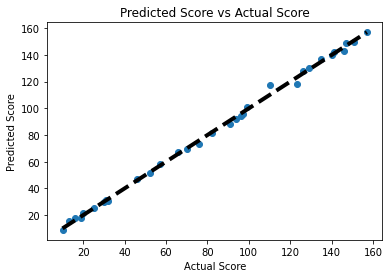

In [48]:
# Plot the predicted score against the actual score
plt.scatter(y_test, predict_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()

In [49]:
# Print a summary of XGboost model
print('XGboost Model Summary')
print('------------------')
for i, col in enumerate(X.columns):
    print(col, ':', xgbreg.feature_importances_[i])
print('------------------')
print('R-squared:',xgb_r2)
print('------------------')

XGboost Model Summary
------------------
Region : 7.496191e-05
Happiness Score : 0.99792856
Standard Error : 0.00018947203
Economy (GDP per Capita) : 0.00016606387
Family : 0.0008513744
Health (Life Expectancy) : 0.00020968095
Freedom : 0.00028227863
Trust (Government Corruption) : 0.00015438805
Generosity : 0.00010116617
Dystopia Residual : 4.2046013e-05
------------------
R-squared: 0.998027081024
------------------


In this case, an R-squared value of 0.9980 indicates that the independent variables collectively explain 99.80% of the variance in the dependent variable, which is a relatively high value. The model has a moderate-to-strong predictive power, and the independent variables included in the model are significant in explaining the variation in happiness score

# Support Vector Machine

In [50]:
from sklearn.svm import SVC
svmModel=SVC(kernel='rbf',random_state=1)
svmModel.fit(X_train,y_train) # Fit the model

SVC(random_state=1)

In [51]:
#Predicting the test set result
svmpredict=svmModel.predict(X_test) # Predicting the model
svmpredict.shape

(32,)

In [52]:
#Accuracy and various Metrics for the model
svm_testing=round(svmModel.score(X_train, y_train)*100,2)
svm_mae=mean_absolute_error(svmpredict,y_test)
svm_mse=mean_squared_error(svmpredict,y_test)
svm_rmse=np.sqrt(mean_squared_error(svmpredict,y_test))
svm_r2=r2_score(y_test,svmpredict)
print('Mean absolute error  =>',svm_mae)
print('Mean squared error  =>',svm_mse)
print('Root Mean squared error  =>',svm_rmse)
print('R2 Score  =>',svm_r2)
print("Accuracy Score of Testing Data is =>",svm_testing)

Mean absolute error  => 13.15625
Mean squared error  => 312.09375
Root Mean squared error  => 17.66617530763238
R2 Score  => 0.861925884705798
Accuracy Score of Testing Data is => 100.0


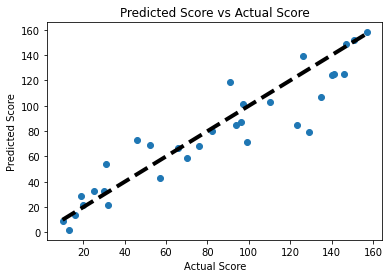

In [53]:
# Plot the predicted score against the actual score
plt.scatter(y_test, svmpredict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()

# 8: Comparing the models and Model Evaluation

In [54]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',fontweight="black",fontsize='22')

In [55]:
# Results
models_metrics = pd.DataFrame([
    ["Linear Regression Model", LR_r2*100, LR_mse],
    ["Random Forest Model",rfc_r2*100, rfc_mse],
    ["XGBoost Model", xgb_r2*100, xgb_mse],
    ["Support Vector Model", svm_r2*100, svm_mse]
])
models_metrics.columns= ["Model","R^2","MSE"]
models_metrics.set_index("Model")
models_metrics

,Model,R^2,MSE
0,Linear Regression Model,98.435031,35.373532
1,Random Forest Model,78.874812,477.500000
2,XGBoost Model,99.802708,4.459458
3,Support Vector Model,86.192588,312.093750


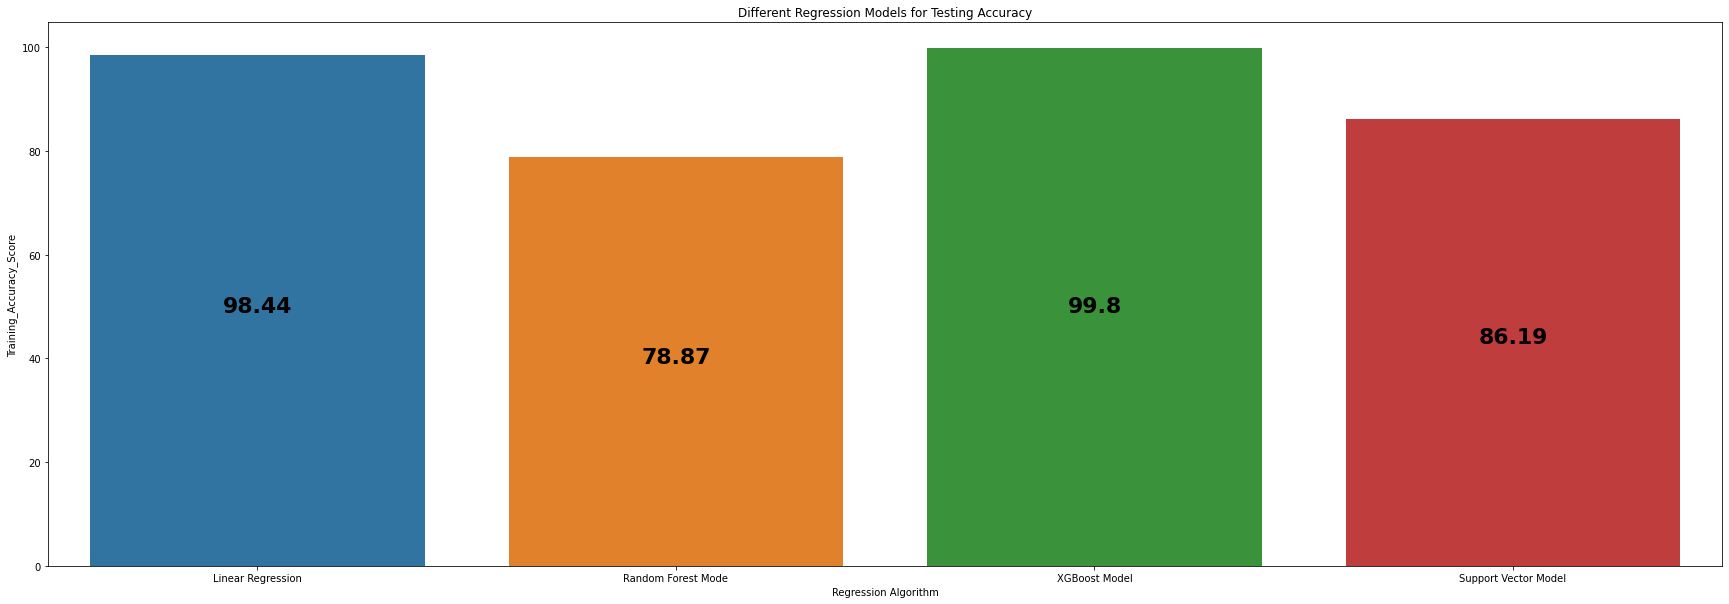

In [56]:
# Creating a bar plot
x= ['Linear Regression','Random Forest Mode','XGBoost Model','Support Vector Model']
y= [round(LR_r2*100,2),round(rfc_r2*100,2),round(xgb_r2*100,2),round(svm_r2*100,2)]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Regression Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Regression Models for Testing Accuracy")

#plt.legend()
plt.show()

# 9: Project Outcomes & Conclusion

The Exploratory Data and predictive analysis provided valuable insights into the factors that contribute to happiness scores across the  continents. We can infere that there is a strong positive correlations between GDP per capita, social support, and healthy life expectancy and happiness scores, indicating that these factors are important in promoting happiness. In contrast, perceptions of corruption and generosity showed weak positive correlations with happiness scores, suggesting that these factors may have a lesser impact on overall happiness levels

We can see from the models used, Linear Regression, Random Forest classifier,XGBoost  and support vector machine model, all of the models perfom better while predicting the Happiness Score of a country but the two best models are Linerar regression and XGBoost. However the performance of all the models is nearly the same.